## Least-squares solutions in Julia.

<br />

When we're confronted with **large amounts of data**, we often look for a **simple quantitative model** that describes basic trends in the data.

<br />

For example, suppose we are measuring the amount of time customers spend in our store. We want to understand the relationship between variables $t=$"time spent in store" and $m$="money spent at checkout."

<br />

Here is a sample of (synthetic) data collected in a matrix: the left column has the time measurements $t_1,t_2,\ldots,t_n$ and the right column has the amount of measurements $m_1,m_2,\ldots,m_n$.


In [165]:
# generate customer data
n = 100
t = 20*rand(n)
#m = 0.3*t.^2 + 2*t + 30*rand(n)
m = 300 ./ (1 .+ exp.(-(t.-20)/6.5)) + 35*rand(n)

data = [t m]

100×2 Matrix{Float64}:
 13.2019    112.634
  7.81818    61.812
  8.07477    47.5651
 19.1703    147.968
  1.50192    21.4934
 18.2696    152.165
  9.45868    56.4961
  3.2809     45.5131
  7.22552    59.3135
  8.81721    62.3885
  2.99229    21.4012
  2.63958    35.0781
 15.5887    101.839
  ⋮         
  0.668849   32.6133
 11.8905     98.7587
 11.1965     68.2214
 15.7339    134.037
  1.13775    45.1733
 15.5209    128.961
 19.6157    165.514
 10.1839     84.5181
 18.7281    136.218
 15.4049    104.055
 16.6003    138.31
 16.1531    112.939

We can visualize the relationship between the columns better by plotting the data in the $(t,m)$ plane.

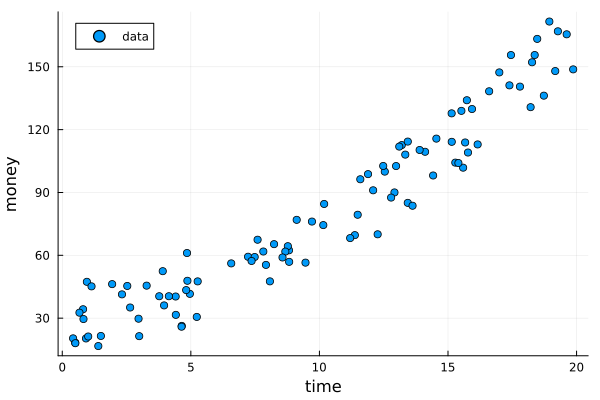

In [166]:
using Plots

# plot the data
plot(t, m, seriestype=:scatter, label=:"data")
xlabel!("time")
ylabel!("money")

Plotting by eye is a great tool, but can we write down a simple equation that describes the relationship between $t$ and $m$? An equation is useful if we want to make predictions about the behavior of future customers.

<br />

## Linear regression

Let's start by finding the line that best fits the data. We need to find the slope $D$ and intercept $C$ that make the two sides of these equations agree:

$$ \begin{aligned} C + Dt_1 &= m_1, \\ C + Dt_2 &= m_2, \\ \vdots \\ C + Dt_n &= m_n. \end{aligned} $$

We have $n$ equations in $2$ unknowns, $C$ and $D$. In matrix notation, the equations become $Ax=m$:

$$ \begin{pmatrix}1 & t_1 \\ 1 & t_2 \\ \vdots & \vdots \\ 1 & t_n  \end{pmatrix}\begin{pmatrix} C \\ D\end{pmatrix} = \begin{pmatrix}m_1 \\ m_2 \\ \vdots \\ m_n \end{pmatrix}. $$

If $t_1,t_2,\ldots,t_n$ are not all the same, then $A$ has independent columns. The equations usually have no solution because we can't make a single straight line go through all the data points. The right-hand side is usually _not_ in the column space. 

In [167]:
using LinearAlgebra

A = [ones(n) t]             # coefficient matrix
display(rank(A))            # A usually has rank(A) = 2 independent columns
display(rank([A m]))        # b is usually not a combination of the columns of A

2

3

Instead, we choose $x$ to make $Ax-b$ as small as possible! This special value $x=x_*$ is called the _least-squares solution_. How do we find $x_* = [C_{\rm best},\,\, D_{\rm best}]^T$? We solve the normal equations!

In [168]:
M = A' * A
b = A' * m
xstar = M \ b

2-element Vector{Float64}:
 11.954859857331227
  6.928107852700091

The best intercept is $C_{\rm best}\approx -17.5$ and the best slope is $D_{\rm best}\approx 10.2$. Let's plot the line over our data to see how it looks.

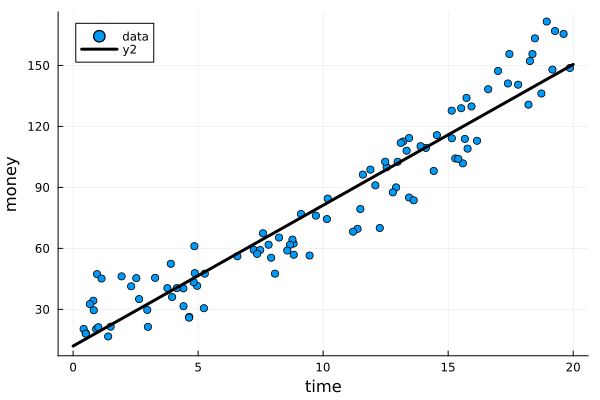

In [169]:
tt = 20*collect(0:250)/250      # equally spaced points in the interval [0, 20]
mm = xstar[1] .+ xstar[2]*tt

plot!(tt,mm, lc=:black, lw=:3)

Not bad! Our best fit line is clearly capturing the basic trend in the data. But to my eye, comparing to a straight line reveals some curvature in the data. Can we capture this curvature quantitatively?

<br />

## Quadratic regression

We try to caputre the upward curve by adding a quadratic term to our linear model. We need to find the polynomial coefficients in $p(x)=D+Ct+Et^2$ that make the two sides of these equations agree:

$$ \begin{aligned} C + Dt_1 + Et_1^2 &= m_1, \\ C + Dt_2 + Et_2^2 &= m_2, \\ \vdots \\ C + Dt_n + Et_n^2 &= m_n. \end{aligned} $$

We now have $n$ equations in $3$ unknowns, $C$, $D$, and $E$, and in matrix notation,

$$ \begin{pmatrix}1 & t_1 & t_1^2\\ 1 & t_2 & t_2^2\\ \vdots & \vdots \\ 1 & t_n & t_n^2  \end{pmatrix}\begin{pmatrix} C \\ D \\ E\end{pmatrix} = \begin{pmatrix}m_1 \\ m_2 \\ \vdots \\ m_n \end{pmatrix}. $$

Again, the equations usually have no solution because we can't make a single straight line go through all the data points, i.e., the right-hand side is usually _not_ in the column space.

In [170]:
A = [ones(n) t t.^2]        # new n x 3 coefficient matrix
display(rank(A))            # A usually has rank(A) = 3 independent columns
display(rank([A m]))        # b is usually not a combination of the columns of A

3

4

Instead, we solve the normal equations and find the least-squares solution $x_*=[C,\,\,D,\,\,E]^T$, the coefficients of the quadratic polynomial that best fits the data.

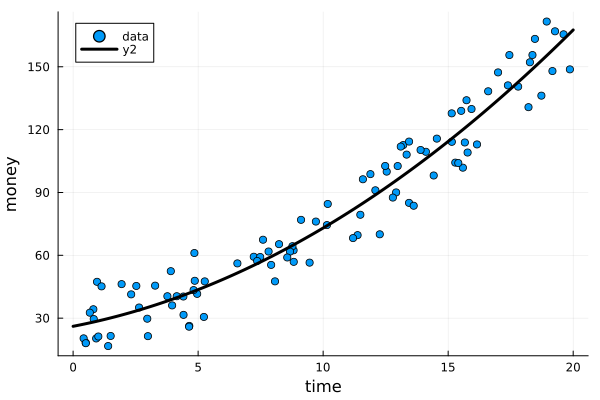

In [171]:
# solve the normal equations
M = A' * A
b = A' * m
xstar = M \ b

# visualize the least-squares fit at equispaced points in [0 20]
tt = 20*collect(0:250)/250
mm = xstar[1] .+ xstar[2]*tt .+ xstar[3]*tt.^2

# plot the data
plot(t, m, seriestype=:scatter, label=:"data")
plot!(tt, mm, lc=:black, lw=:3)
xlabel!("time")
ylabel!("money")


Even better! It looks like we captured the "centerline" of the data pretty well - the data points are roughly equally distributed on both sides of the line.

## Model predictions

So, can we use our least-squares fit to make predictions? What if we want to make a prediction about customers who shop longer: $20$ to $40$ minutes?

<br /> 

Let's get some more customer data, and compare with our quadratic model prediction...

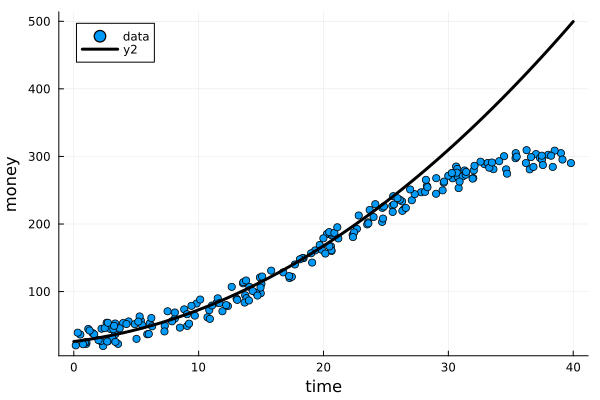

In [172]:
# generate customer data
n = 200
t = 40*rand(n)
#m = 0.3*t.^2 + 2*t + 30*rand(n)
m = 300 ./ (1 .+ exp.(-(t.-20)/6.5)) + 35*rand(n)


# visualize the least-squares fit preduction at equispaced points in [0 40]
tt = 40*collect(0:500)/500
mm = xstar[1] .+ xstar[2]*tt .+ xstar[3]*tt.^2

# plot the data
plot(t, m, seriestype=:scatter, label=:"data")
plot!(tt, mm, lc=:black, lw=:3)
xlabel!("time")
ylabel!("money")

Our model appears to get worse as we move from $20$ minutes to $40$ minutes, and seriously overestimates how much the long shoppers are spending.

<br />

Be warned: using regression to _extrapolate_ from data can produce disastrous predictions away from the region where the data was collected! 

<br />

## What should we do?

<br />

Your ideas go here!

In [ ]:
## Build a better model






## Build a better model